# Testing Sparse Zero-Inflated Count Matrix Factorization in simulated data 

In [1]:
from pCMF.misc import utils
from pCMF.models.pcmf.inferences import cavi_new, svi_new

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Experiment parameters
N = 1000 # number of observations
P = 20 # observation space dimensionality
K = 10 # latent space dimensionality
C = 2 # number of clusters

# Generate data set
z_p = 0.5
eps = 5.
Y, D, X, R, V, U, clusters = utils.generate_sparse_data(N, P, K, C=C, zero_prob=z_p, noisy_prop=0.5,
                                                 eps_U=eps, return_all=True)

Y_train, Y_test, U_train, U_test, c_train, c_test = train_test_split(Y, U.T, clusters, test_size=0.2, random_state=42)

In [3]:
T = 60.
S = 1.

In [4]:
# Run PCA
pca_U = PCA(n_components=K).fit_transform(np.log(Y_train + 1.))
pca_tsne = TSNE(n_components=2).fit_transform(pca_U)

In [11]:
# Prior parameters
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
pi_S = np.ones((P,)) * 0.5

In [6]:
print('Simple GaP:')
infgap = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, empirical_bayes=False)
infgap.run(n_iterations=4000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
gap_U = infgap.a[0] / infgap.a[1] # VI estimate is the mean of the variational approximation
gap_V = infgap.b[0] / infgap.b[1]
gap_S = infgap.estimate_S(infgap.p_S)
gap_tsne = TSNE(n_components=2).fit_transform(gap_U)

Simple GaP:
Iteration 52/4000. Log-likelihood: 191.493. Elapsed: 61 seconds


In [7]:
print('Simple GaP-EB:')
infgapeb = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, empirical_bayes=True)
infgapeb.run(n_iterations=4000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
gapeb_U = infgapeb.a[0] / infgapeb.a[1] # VI estimate is the mean of the variational approximation
gapeb_V = infgapeb.b[0] / infgapeb.b[1]
gapeb_S = infgapeb.estimate_S(infgapeb.p_S)
gapeb_tsne = TSNE(n_components=2).fit_transform(gapeb_U)

Simple GaP-EB:
Iteration 51/4000. Log-likelihood: 175.256. Elapsed: 60 seconds


In [8]:
print('Zero-Inflated GaP:')
infzigap = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, pi_D=pi_D, empirical_bayes=False)
infzigap.run(n_iterations=4000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
zigap_U = infzigap.a[0] / infzigap.a[1] # VI estimate is the mean of the variational approximation
zigap_V = infzigap.b[0] / infzigap.b[1]
zigap_S = infzigap.estimate_S(infzigap.p_S)
zigap_tsne = TSNE(n_components=2).fit_transform(zigap_U)

Zero-Inflated GaP:
Iteration 43/4000. Log-likelihood: 192.193. Elapsed: 61 seconds


In [9]:
print('Zero-Inflated GaP-EB:')
infzigapeb = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, pi_D, empirical_bayes=True)
infzigapeb.run(n_iterations=4000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
zigapeb_U = infzigapeb.a[0] / infzigapeb.a[1] # VI estimate is the mean of the variational approximation
zigapeb_V = infzigapeb.b[0] / infzigapeb.b[1]
zigapeb_S = infzigapeb.estimate_S(infzigapeb.p_S)
zigapeb_tsne = TSNE(n_components=2).fit_transform(zigapeb_U)

Zero-Inflated GaP-EB:
Iteration 42/4000. Log-likelihood: 193.152. Elapsed: 60 seconds


In [15]:
print('Sparse Zero-Inflated GaP:')
infszigap = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, pi_D=pi_D, pi_S=pi_S, empirical_bayes=False)
infszigap.run(n_iterations=4000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
szigap_U = infszigap.a[0] / infszigap.a[1] # VI estimate is the mean of the variational approximation
szigap_V = infszigap.b[0] / infszigap.b[1]
szigap_S = infszigap.estimate_S(infszigap.p_S)
szigap_tsne = TSNE(n_components=2).fit_transform(szigap_U)

Sparse Zero-Inflated GaP:


/home/pferreira/pCMF/pCMF/misc/utils.py:94: RuntimeWarning: divide by zero encountered in log
  ll[idx] = X[idx] * np.log(param[idx]) - param[idx] - factor


Iteration 55/4000. Log-likelihood: -inf. Elapsed: 60 seconds


In [16]:
print('Sparse Zero-Inflated GaP-EB:')
infszigapeb = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, pi_D=pi_D, pi_S=pi_S, empirical_bayes=True)
infszigapeb.run(n_iterations=4000, calc_ll=True, calc_silh=True, clusters=c_train, sampling_rate=S, max_time=T)
szigapeb_U = infszigapeb.a[0] / infszigapeb.a[1] # VI estimate is the mean of the variational approximation
szigapeb_V = infszigapeb.b[0] / infszigapeb.b[1]
szigapeb_S = infszigapeb.estimate_S(infszigapeb.p_S)
szigapeb_tsne = TSNE(n_components=2).fit_transform(szigapeb_U)

Sparse Zero-Inflated GaP-EB:


/home/pferreira/pCMF/pCMF/misc/utils.py:94: RuntimeWarning: divide by zero encountered in log
  ll[idx] = X[idx] * np.log(param[idx]) - param[idx] - factor


/home/pferreira/pCMF/venv/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


Iteration 28/4000. Log-likelihood: -inf. Elapsed: 61 seconds


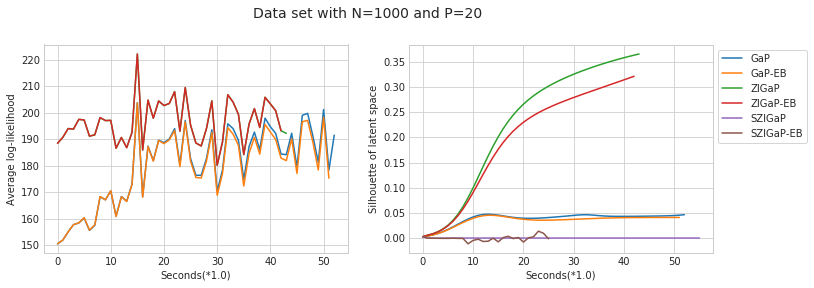

In [17]:
fig = plt.figure(figsize=(12, 4))

ax = plt.subplot(1, 2, 1)
ax.plot(infgap.ll_time, label='GaP')
ax.plot(infgapeb.ll_time, label='GaP-EB')
ax.plot(infzigap.ll_time, label='ZIGaP')
ax.plot(infzigapeb.ll_time, label='ZIGaP-EB')
ax.plot(infszigap.ll_time, label='SZIGaP')
ax.plot(infszigapeb.ll_time, label='SZIGaP-EB')
plt.ylabel('Average log-likelihood')
plt.xlabel('Seconds(*{0})'.format(S))

ax = plt.subplot(1, 2, 2)
ax.plot(infgap.silh_time, label='GaP')
ax.plot(infgapeb.silh_time, label='GaP-EB')
ax.plot(infzigap.silh_time, label='ZIGaP')
ax.plot(infzigapeb.silh_time, label='ZIGaP-EB')
ax.plot(infszigap.silh_time, label='SZIGaP')
ax.plot(infszigapeb.silh_time, label='SZIGaP-EB')
plt.ylabel('Silhouette of latent space')
plt.xlabel('Seconds(*{0})'.format(S))

plt.legend(loc='upper left', bbox_to_anchor=[1., 1.], frameon=True)
plt.suptitle('Data set with N={} and P={}'.format(N, P), fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

In [18]:
gap_dll = utils.log_likelihood(Y_train, gap_U, gap_V, infgap.p_D, gap_S)
gapeb_dll = utils.log_likelihood(Y_train, gapeb_U, gapeb_V, infgapeb.p_D, gapeb_S)
zigap_dll = utils.log_likelihood(Y_train, zigap_U, zigap_V, infzigap.p_D, zigap_S)
zigapeb_dll = utils.log_likelihood(Y_train, zigapeb_U, zigapeb_V, infzigapeb.p_D, zigapeb_S)
szigap_dll = utils.log_likelihood(Y_train, szigap_U, szigap_V, infszigap.p_D, szigap_S)
szigapeb_dll = utils.log_likelihood(Y_train, szigapeb_U, szigapeb_V, infszigapeb.p_D, szigapeb_S)

scores = {'GaP': gap_dll, 'GaP-EB': gapeb_dll, 'ZIGaP': zigap_dll, 'ZIGaP-EB': zigapeb_dll, 'SZIGaP': szigap_dll, 'SZIGaP-EB': szigapeb_dll}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Full data log-likelihood:')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))

Full data log-likelihood:
- GaP: -inf
- GaP-EB: -inf
- ZIGaP: -inf
- ZIGaP-EB: -inf
- SZIGaP: -inf
- SZIGaP-EB: -inf


/home/pferreira/pCMF/pCMF/misc/utils.py:94: RuntimeWarning: divide by zero encountered in log
  ll[idx] = X[idx] * np.log(param[idx]) - param[idx] - factor


In [19]:
gap_holl = infgap.predictive_ll(Y_test)
gapeb_holl = infgapeb.predictive_ll(Y_test)
zigap_holl = infzigap.predictive_ll(Y_test)
zigapeb_holl = infzigapeb.predictive_ll(Y_test)
szigap_holl = infszigap.predictive_ll(Y_test)
szigapeb_holl = infszigapeb.predictive_ll(Y_test)

scores = {'GaP': gap_holl, 'GaP-EB': gapeb_holl, 'ZIGaP': zigap_holl, 'ZIGaP-EB': zigapeb_holl, 'SZIGaP': szigap_holl, 'SZIGaP-EB': szigapeb_holl}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Held-out log-likelihood:')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))

/home/pferreira/pCMF/pCMF/misc/utils.py:94: RuntimeWarning: divide by zero encountered in log
  ll[idx] = X[idx] * np.log(param[idx]) - param[idx] - factor


Held-out log-likelihood:
- ZIGaP: 1.91e+02
- ZIGaP-EB: 1.91e+02
- GaP: 1.83e+02
- GaP-EB: 1.8e+02
- SZIGaP: -inf
- SZIGaP-EB: -inf


In [20]:
true_silh = silhouette_score(U_train, c_train)
gap_silh = silhouette_score(gap_U, c_train)
gapeb_silh = silhouette_score(gapeb_U, c_train)
zigap_silh = silhouette_score(zigap_U, c_train)
zigapeb_silh = silhouette_score(zigapeb_U, c_train)
szigap_silh = silhouette_score(szigap_U, c_train)
szigapeb_silh = silhouette_score(szigapeb_U, c_train)
pca_silh = silhouette_score(pca_U, c_train)

scores = {'GaP': gap_silh, 'GaP-EB': gapeb_silh, 'ZIGaP': zigap_silh, 'ZIGaP-EB': zigapeb_silh, 'SZIGaP': szigap_silh, 'SZIGaP-EB': szigapeb_silh, 'PCA': pca_silh}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Silhouette scores (higher is better):')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))
    
print('\nSilhouette of true U:')
print('%0.3f' % true_silh)

Silhouette scores (higher is better):
- ZIGaP: 0.365
- ZIGaP-EB: 0.321
- GaP: 0.0465
- GaP-EB: 0.0411
- SZIGaP: 0.000212
- SZIGaP-EB: nan
- PCA: 0.00293

Silhouette of true U:
0.540


/home/pferreira/pCMF/venv/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


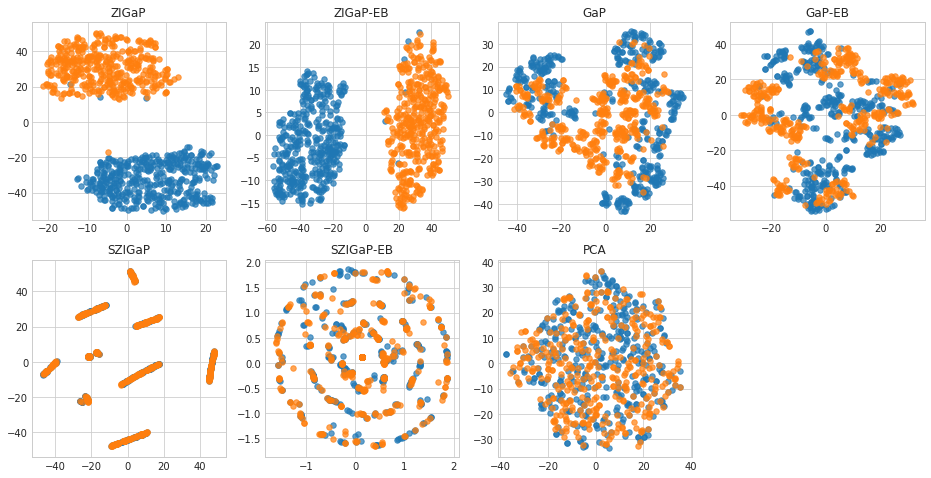

In [25]:
# Plot in decreasing silhouette order
U_list = [gap_tsne, gapeb_tsne, zigap_tsne, zigapeb_tsne, szigap_tsne, szigapeb_tsne, pca_tsne]
title_list = ['GaP', 'GaP-EB', 'ZIGaP', 'ZIGaP-EB', 'SZIGaP', 'SZIGaP-EB', 'PCA']

assert len(U_list) == len(title_list)

n_results = len(U_list)

fig = plt.figure(figsize=(16, 8))

s = 30
alpha = 0.7
labels=None
for i in range(len(U_list)):
    ax = plt.subplot(2, np.ceil(n_results/2), i+1)
    handlers = []
    for c in range(C):
        h = ax.scatter(U_list[title_list.index(sorted_scores[i][0])][c_train==c, 0], U_list[title_list.index(sorted_scores[i][0])][c_train==c, 1], s=s, alpha=alpha)
        handlers.append(h)
    if labels is not None:
        ax.legend(handlers, labels, scatterpoints=1)
    plt.title(sorted_scores[i][0])
plt.show()